# Chapter 2: Probability Distributions

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)
# import the prml package
sys.path.append('F:\\fci\\Pattern Recognation\\Week 03 - Introduction')


## Bernoulli Distribution

$\Large 𝑝(𝐷│\mu)=\prod_{𝑛=1}^𝑁{\mu^{𝑥_𝑛}(1−\mu)^{1−𝑥_𝑛}}$

$\Large \mu_{ML} = \frac{1}{N} \sum_{n=1}^N{x_n}$

**Steps**

1.  Import the Bernoulli class: `from prml.rv import Bernoulli`

2.  Create a dataset of three 1s and one 0: `dataset = np.array([0., 1., 1., 1.])`

3.  Plot the dataset as a bar graph:
    ```
    count_0 = len(dataset[dataset == 0.])
    count_1 = len(dataset[dataset == 1.])
    plt.bar(['0', '1'], [count_0, count_1], color='b')  
    ```
4.  Create a Bernoulli model: `model = Bernoulli()`

5.  Fit the model to the dataset: `model.fit(dataset)`

6.  Print the $\mu_{ML}$: `print(model)`

Bernoulli(
    mu=0.75
)


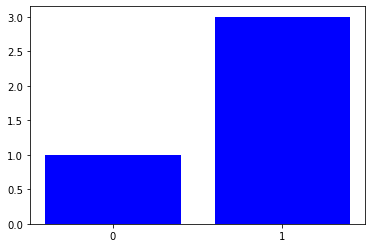

In [6]:
from prml.rv import Bernoulli

# create the dataset
dataset = np.array([0., 1., 1., 1.])

# plot the dataset
count_0 = len(dataset[dataset == 0.])
count_1 = len(dataset[dataset == 1.])
plt.bar(['0', '1'], [count_0, count_1], color='b')

# fit a Bernoulli model
model = Bernoulli()
model.fit(dataset)

print(model)  # prints mu, which is the probability that we get x=1
plt.show()


#### Let's do an experiment and test how the model can randomly draw 0 or 1 values. We will do 1000 experiment. 

**Steps**
1.  Create an empty list to hold the randomly drawn values: `samples = []`

2.  Do 1000 experiment by drawing a number from the model: 
    
    ```
    num_exper = 1000
    for i in range(num_exper):
        samples.append(model.draw())
    ```
    
3.  Count the number of 0s in the list: `count_0 = samples.count(0)`

4.  Count the number of 1s in the list: `count_1 = samples.count(1)`

5.  Compute the likelihood of getting 0: `prop_0 = count_0 / num_exper`

6.  Compute the likelihood of getting 1: `prop_1 = count_1 / num_exper`

7.  Print the $\mu_{ML}$: `print(model)`

In [3]:
samples = []  # the drawn values
num_exper = 1000

for i in range(num_exper):  # draw a random variable from the model and store it in the list
    samples.append(model.draw())

count_0 = samples.count(0)  # number of zeros
count_1 = samples.count(1)  # number of ones
prop_0 = count_0 / num_exper  # Proportion of zeros
prop_1 = count_1 / num_exper  # Proportion of ones
print("The number of zeros:", count_0)
print("The number of ones:", count_1)
print("The proportion of zeros: ", prop_0)
print("The proportion of ones", prop_1)

print(model)


The number of zeros: 267
The number of ones: 733
The propotion of zeros:  0.267
The propotion of ones 0.733


#### What if we have a dataset like this dataset = [1., 1., 1., 1.]

**Steps**

1.  Create a dataset of three 1s and one 0: `dataset = np.array([1., 1., 1., 1.])`

2.  Plot the dataset as a bar graph:
    ```
    count_0 = len(dataset[dataset == 0.])
    count_1 = len(dataset[dataset == 1.])
    plt.bar(['0', '1'], [count_0, count_1], color='b')  
    ```
3.  Create a Bernoulli model: `model = Bernoulli()`

4.  Fit the model to the dataset: `model.fit(dataset)`

5.  Print the $\mu_{ML}$: `print(model)`

If we have data for 4 random experiments that all have 1s. Does it mean we never have 0s?

Bernoulli(
    mu=1.0
)


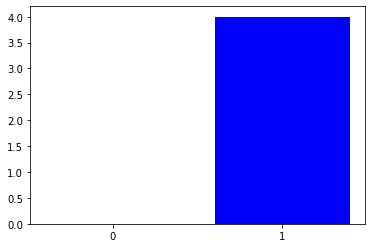

In [4]:
# create the dataset
dataset = np.array([1., 1., 1., 1.])

# plot the dataset
count_0 = len(dataset[dataset == 0.])
count_1 = len(dataset[dataset == 1.])
plt.bar(['0', '1'], [count_0, count_1], color='b')

# fit a Bernoulli model
model = Bernoulli()
model.fit(dataset)

print(model)  # prints mu, which is the probability that we get x=1
plt.show()


The model has $\mu=1.0$, it means that it will not predict any zeros! 

Let's experiment it!

**Steps**
1.  Create an empty list to hold the randomly drawn values: `samples = []`

2.  Do 1000 experiment by drawing a number from the model: 
    
    ```
    num_exper = 1000
    for i in range(num_exper):
        samples.append(model.draw())
    ```
    
3.  Count the number of 0s in the list: `count_0 = samples.count(0)`

4.  Count the number of 1s in the list: `count_1 = samples.count(1)`

5.  Compute the likelihood of getting 0: `prop_0 = count_0 / num_exper`

6.  Compute the likelihood of getting 1: `prop_1 = count_1 / num_exper`

In [5]:
samples = []  # the drawn values
num_exper = 1000

for i in range(num_exper):  # draw a random variable from the model and store it in the list
    samples.append(model.draw())

count_0 = samples.count(0)  # number of zeros
count_1 = samples.count(1)  # number of ones
prop_0 = count_0 / num_exper  # Proportion of zeros
prop_1 = count_1 / num_exper  # Proportion of ones

# This causes overfitting
print("The number of zeros:", count_0)
print("The number of ones:", count_1)
print("The proportion of zeros: ", prop_0)
print("The proportion of ones", prop_1)


The number of zeros: 0
The number of ones: 1000
The propotion of zeros:  0.0
The propotion of ones 1.0


## Beta Distribution

$\Large 𝐵𝑒𝑡𝑎(\mu│𝑎, 𝑏)=\frac{\Gamma (𝑎+𝑏)}{(\Gamma (𝑎)*\Gamma(𝑏))}  * ( \mu^{𝑎−1} (1−\mu)^{𝑏−1})$

$a$ and $b$ are hyperparameter that controls the distribution.

Plot the beta distribution for different values of [a, b] = [0.1, 0.1], [1, 1], [2, 3], [8, 4]

**Steps**

1.  Create 100 number between 0 and 1: `x = np.linspace(0, 1, 100)` 

2.  Loop through the [a, b] values: `for i, [a, b] in enumerate([ [0.1, 0.1], [1, 1], [2, 3], [8, 4] ]):`

    1.  create a subplot: `plt.subplot(2, 2, i+1)`

    2.  Define a beta distribution model given [a, b]: `beta = Beta(a, b)`

    3.  Compute the PDF of the beta distribution: `pdf = beta.pdf(x)`

    4.  Plot the x-values against the PDF: `plt.plot(x, pdf, c='r')`

    5. Set the limits of the figure:
        ```
        plt.xlim(0, 1)
        plt.ylim(0, 3)
        ```

    6. Add annotations to the figure: 
        ```
        plt.annotate("a={}".format(a), (0.1, 2.5))
        plt.annotate("b={}".format(b), (0.1, 2.1))
        ```

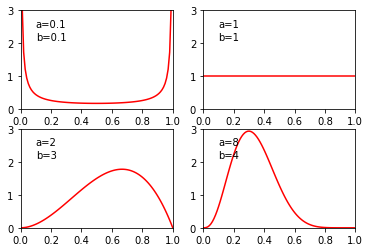

<Figure size 1800x1080 with 0 Axes>

In [4]:
from prml.rv import Beta

# create 100 x values in range [0, 1]
x = np.linspace(0, 1, 100)

# plot the beta distribution for a,b = [0.1, 0.1], [1, 1], [2, 3], [8, 4]
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i+1)
    beta = Beta(a, b)
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    # compute the probability density function of the continuos variable x
    pdf = beta.pdf(x)
    plt.plot(x, pdf, c='r')
    plt.annotate("a={}".format(a), (0.1, 2.5))
    plt.annotate("b={}".format(b), (0.1, 2.1))

plt.figure(figsize=(15, 15))
plt.show()


Let's combine the prior distribution of the $\mu$ (beta distribution) with overfitted Bernoulli distribution.

**Steps**

1.  Create 100 element values between 0 and 1 for plotting: `x = np.linspace(0, 1, 100)` 

2.  Create a beta distribution with a=2 and b=2: `beta = Beta(2, 2)`

3.  Compute the PDF of the beta distribution: `pdf_beta = beta.pdf(x)`

4.  Create a Bernoulli distribution with $\mu=beta$: `model = Bernoulli(mu=beta)`

5.  Create a sample dataset of only the element 1: `sample = np.array([1.])`

6.  Fit the Bernoulli model to the dataset: `model.fit(sample)`

7.  Compute the PDF of the Bernoulli model: `pdf_bern = model.mu.pdf(x)`

8.  Plot the prior distribution of beta:
     ```
     plt.subplot(1, 3, 1)
     plt.xlim(0, 1)
     plt.ylim(0, 2)
     plt.plot(x, pdf, c='r')
     plt.annotate('prior', (0.1, 1.5))
     ```
9.  Plot the likelihood:
     ```
     plt.subplot(1, 3, 2)
     plt.xlim(0, 1)
     plt.ylim(0, 2)
     plt.plot(x, x, c='b')
     plt.annotate('likelihood', (0.1, 1.5))
     ```

10.  Plot the x-values against the PDF of the Bernoulli model:
     ```
     plt.subplot(1, 3, 3)
     plt.xlim(0, 1)
     plt.ylim(0, 2)
     plt.plot(x, pdf, c='r')
     plt.annotate("posterior", (0.1, 1.5))
     ```


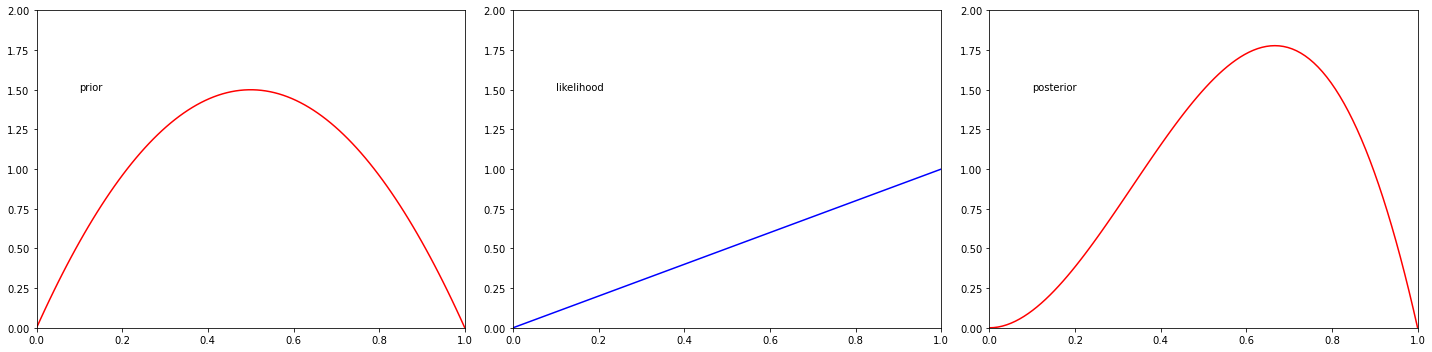

In [8]:
## Code goes here
plt.figure(figsize=(20, 5))

x = np.linspace(0, 1, 100)
beta = Beta(2, 2)
pdf_beta = beta.pdf(x)

model = Bernoulli(mu=beta)
sample = np.array([1.])
model.fit(sample)
pdf_bern = model.mu.pdf(x)

plt.subplot(1, 3, 1)
plt.plot(x, pdf_beta, color='r')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.annotate("Beta distribution (prior)", (0.1, 1.5))

plt.subplot(1, 3, 2)
plt.plot(x, x, color='b')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.annotate("Likelihood", (0.1, 1.5))

plt.subplot(1, 3, 3)
plt.plot(x, pdf_bern, color='r')
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.annotate("Posterior distribution", (0.1, 1.5))

plt.show()

 Experiment the beta distribution with overfitted Bernoulli

 **Steps**

 1. Create an empty set to hold the drawn samples: `samples = []`

 2. Define the number of experiments to 1000: `num_exper = 1000`

 3. Define a Bernoulli distribution with $\mu=beta$: `model = Bernoulli(mu=beta)`

 4. Do the 1000 experiment:

    ```
    for i in range(num_exper):
            samples.append(model.draw())
    ```

 5. Count the number of 0s: `count_0 = samples.count(0)`

 6. Count the number of 1s: `count_1 = samples.count(1)`

 7. Compute the proportion of 0s: `prop_0 = count_0 / num_exper`

 8. Compute the proportion of 1s: `prop_1 = count_1 / num_exper`

In [9]:
samples = []  # the drawn values
num_exper = 1000

model = Bernoulli(mu=beta)

for i in range(num_exper):  # draw a random variable from the model and store it in the list
    samples.append(model.draw())

count_0 = samples.count(0)  # number of zeros
count_1 = samples.count(1)  # number of ones
prop_0 = count_0 / num_exper  # Proportion of zeros
prop_1 = count_1 / num_exper  # Proportion of ones

# This causes overfitting
print("The number of zeros:", count_0)
print("The number of ones:", count_1)
print("The proportion of zeros: ", prop_0)
print("The proportion of ones", prop_1)


The number of zeros: 415
The number of ones: 585
The proportion of zeros:  0.415
The proportion of ones 0.585


Compare the maximum likelihood estimation and the Bayesian estimation

**Steps**

1.  Define a Bernoulli model: `model = Bernoulli()`

2.  Fit the model to the dataset of [1]: `model.fit(np.array([1]))`

3.  Print the number of 1s drawn from the distribution: `print("{} out of 10000 is 1".format(model.draw(10000).sum()))`

4.  Define a Bernoulli distribution with $\mu=Beta(1,1)$: `model = Bernoulli(mu=Beta(1, 1))`

5.  Fit the model to the dataset of [1]: `model.fit(np.array([1]))`    

6.  Print the number of 1s drawn from the distribution: `print("{} out of 10000 is 1".format(model.draw(10000).sum()))`

In [10]:
print("Maximum likelihood estimation")
model = Bernoulli()
model.fit(np.array([1]))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

print("Bayesian estimation")
model = Bernoulli(mu=Beta(1, 1))
model.fit(np.array([1]))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))


Maximum likelihood estimation
10000 out of 10000 is 1
Bayesian estimation
6643 out of 10000 is 1


## Dirichlet Distribution

![formula](img.PNG)

Define a multinomial (categorical distribution) that fits a dataset as the following


| **x**    | $x_1$ | $x_2$ | $x_3$ |
|----------|-----|-----|-----|
| sample 1 | 0   | 1   | 0   |
| sample 2 | 1   | 0   | 0   |
| sample 3 | 1   | 0   | 0   |
| sample 4 | 0   | 0   | 1   |

for each feature $x$: 

$\Large ~~~~~~~~~~~\mu= \frac {number~of~samples~with ~ x=1}{total~number~of~samples}$

**Steps**

1.  Create a Categorical model: `model = Categorical()`

2.  Create the dataset: `dataset = np.array([ [0,1,0], [1,0,0], [1,0,0], [0,0,1], ])`

3.  Fit the model to the dataset: `model.fit(dataset)`

4.  Print the model: `print(model)`

In [11]:
from prml.rv import Categorical

model = Categorical()
dataset = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
])

model.fit(dataset)  # computes the mu values

print(model)


Categorical(
    mu=[0.5  0.25 0.25]
)


Draw 1000 random variable from the distribution

**Steps**

1.  Define the number of experiments: `num_exper = 1000`

2.  Create an empty list to hold the drawn values: `samples = []`

3.  Draw the samples:

    ```
    for i in range(num_exper):
        samples.append(model.draw())
    ```

4.  Convert the samples into a 100\*1\*3 array: `samples = np.array(samples)`

5.  Compute the count of occurrence of each feature:
    
    ```
    x_1 = samples[:,:,0].sum()
    x_2 = samples[:,:,1].sum()
    x_3 = samples[:,:,2].sum()
    print(x_1/num_exper)
    print(x_2/num_exper)
    print(x_3/num_exper)
    ```

In [12]:
# perform 1000 experiments
# np.random.seed(1234)
num_exper = 1000
samples = []
for i in range(num_exper):
    samples.append(model.draw())  # draw a random sample

# this converts the list into an array of size 100*1*3
samples = np.array(samples)

# compute how many each feature occurs
x_1 = samples[:, :, 0].sum()
x_2 = samples[:, :, 1].sum()
x_3 = samples[:, :, 2].sum()
print(x_1/num_exper)
print(x_2/num_exper)
print(x_3/num_exper)


0.501
0.241
0.258


Let's try another inbalanced dataset

| **x**    | $x_1$ | $x_2$ | $x_3$ |
|----------|-----|-----|-----|
| sample 1 | 0   | 0   | 1   |
| sample 2 | 0   | 0   | 1   |
| sample 3 | 0   | 0   | 1   |
| sample 4 | 0   | 0   | 1   |

The model overfits the data

In [14]:
model = Categorical()

bad_dataset = np.array([
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
])

model.fit(bad_dataset)

print(model)


Categorical(
    mu=[0. 0. 1.]
)


In [15]:
# perform 1000 experiments
# np.random.seed(1234)
num_exper = 1000
samples = []
for i in range(num_exper):
    samples.append(model.draw())  # draw a random sample

# this converts the list into an array of size 100*1*3
samples = np.array(samples)

# compute how many each feature occurs
x_1 = samples[:, :, 0].sum()
x_2 = samples[:, :, 1].sum()
x_3 = samples[:, :, 2].sum()
print(x_1/num_exper)
print(x_2/num_exper)
print(x_3/num_exper)


0.0
0.0
1.0


Apply the Dirichlet distribution as a prior for $\mu$

**Steps**

1.  Create a Dirichlet distribution with $\alpha=[1, 1, 1]$: `dir = Dirichlet(alpha=np.ones(3))`

2.  Define the Categorical model with $\mu=dir$: `model = Categorical(mu=dir)`

3.  Print the model: `print(model)`

In [16]:
from prml.rv import Dirichlet

dir = Dirichlet(alpha=np.ones(3))  # the alpha parameter [1, 1, 1]
model = Categorical(mu=dir)
model


Categorical(
    mu=Dirichlet(
        alpha=[1. 1. 1.]
    )
)

Fit the model to the dataset and print the model to see the new $\alpha$

In [114]:
# fit the data on the same inbalanced dataset
model.fit(bad_dataset)

print(model)


Categorical(
    mu=Dirichlet(
        alpha=[1. 1. 5.]
    )
)


Draw 1000 random variable from the distribution

**Steps**

1.  Normalize the $\alpha$ vector to be in range [0:1]:

    ```
    mu = np.array([1,1,5])
    mu_norm = mu/mu.sum(axis=0,keepdims=0)
    ```

2.  Define a categorical model with $\mu=mu_norm$: `model = Categorical(mu=mu_norm)`

3.  Define the number of experiments: `num_exper = 1000`

4.  Create an empty list to hold drawn samples: `preds = []`

5.  Draw the 1000 sample: 

    ```
    for i in range(num_exper):
        preds.append(model.draw())
    ```

6.  Compute the counts of each drawn category: 

    ```
    x_1 = preds[:,:,0].sum()
    x_2 = preds[:,:,1].sum()
    x_3 = preds[:,:,2].sum()
    print(x_1/num_exper)
    print(x_2/num_exper)
    print(x_3/num_exper)
    ```

In [17]:
# normalize the mu vector to sum up to 1
mu = np.array([1, 1, 5])
mu_norm = mu/mu.sum(axis=0, keepdims=0)
print(mu_norm)

model = Categorical(mu=mu_norm)
# model.fit(bad_dataset)  # we don't need to call fit() because we have estimated it from the Dirichlet distribution
print(model)

num_exper = 1000
preds = []
for i in range(num_exper):
    preds.append(model.draw())  # draw a random sample

preds = np.array(preds)  # this converts the list into an array of size 100*1*3

x_1 = preds[:, :, 0].sum()
x_2 = preds[:, :, 1].sum()
x_3 = preds[:, :, 2].sum()
print(x_1/num_exper)
print(x_2/num_exper)
print(x_3/num_exper)


[0.14285714 0.14285714 0.71428571]
Categorical(
    mu=[0.14285714 0.14285714 0.71428571]
)
0.138
0.149
0.713
